# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [69]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data_df = pd.merge(study_results, mouse_metadata, how='outer', on=['Mouse ID', 'Mouse ID'])
merged_data_df = merged_data_df.rename(columns={'Age_months': 'Age (months)'})

# Display the data table for preview
merged_data_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age (months),Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [73]:
# Checking the number of mice.
total_mice = len(merged_data_df['Mouse ID'].unique())
total_mice

249

In [74]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = merged_data_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
duplicated_mice_ID = merged_data_df.loc[duplicated_mice, 'Mouse ID'].unique()
duplicated_mice_ID

array(['g989'], dtype=object)

In [76]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mice_ID_data = merged_data_df.loc[merged_data_df['Mouse ID'] == duplicated_mice_ID[0]]
duplicated_mice_ID_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age (months),Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [77]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
analysis_data_df = merged_data_df.drop(duplicated_mice_ID_data.index)
# Store analysis starting data file
analysis_data_df.to_csv('data/analysis_data.csv', index=False, header=True)
analysis_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age (months),Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [79]:
# Checking the number of mice in the clean DataFrame.
no_mice_analysis = len(analysis_data_df['Mouse ID'].unique())
no_mice_analysis

248

## Summary Statistics

In [80]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen_gp = analysis_data_df.groupby('Drug Regimen')

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = drug_regimen_gp['Tumor Volume (mm3)'].mean()
median = drug_regimen_gp['Tumor Volume (mm3)'].median()
var = drug_regimen_gp['Tumor Volume (mm3)'].var()
std = drug_regimen_gp['Tumor Volume (mm3)'].std()
sem = drug_regimen_gp['Tumor Volume (mm3)'].sem()
summary_statistics_df = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Variance': var,
    'Standard deviation': std,
    'SEM': sem
})
print('Method I')
summary_statistics_df

Method I


,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [81]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_table = drug_regimen_gp['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg_df = summary_table.rename(columns={
    'mean':'Mean',
    'median': 'Median',
    'var': 'Variance',
    'std': 'Standard deviation',
    'sem': 'SEM'
})
print('Method II')
summary_agg_df

Method II


,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [82]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
no_mice_per_regimen = drug_regimen_gp['Mouse ID'].count().sort_values(ascending=False)
no_mice_per_regimen

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Mouse ID, dtype: int64

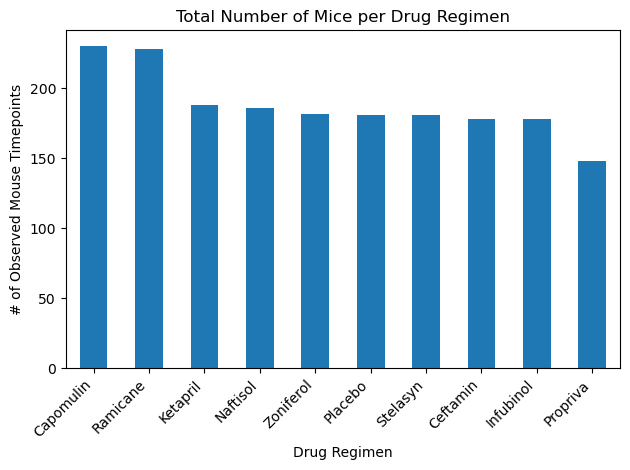

In [83]:
import matplotlib.pyplot as plt
import os  # Import the os module for directory creation

# Assuming you have your data in the 'no_mice_per_regimen' DataFrame

# Generate a bar plot showing the total number of mice for each treatment
pd_bar_mice_per_regimen = no_mice_per_regimen.plot(kind='bar', width=0.5, legend=False)  # Add legend=False to remove the legend

# Set x/y label, title
pd_bar_mice_per_regimen.set_title('Total Number of Mice per Drug Regimen')
pd_bar_mice_per_regimen.set_xlabel('Drug Regimen')
pd_bar_mice_per_regimen.set_ylabel('# of Observed Mouse Timepoints')

# Set the rotation of x-axis labels for better readability (adjust the angle as needed)
pd_bar_mice_per_regimen.set_xticklabels(pd_bar_mice_per_regimen.get_xticklabels(), rotation=45, ha='right')

# Create the 'images' directory if it doesn't exist
if not os.path.exists('images'):
    os.makedirs('images')

# Save bar graph to the Images folder
plt.tight_layout()
plt.savefig('images/pd_bar_mice_per_regimen.png')

# Present the bar chart
plt.show()

# To close the pyplot
plt.close()



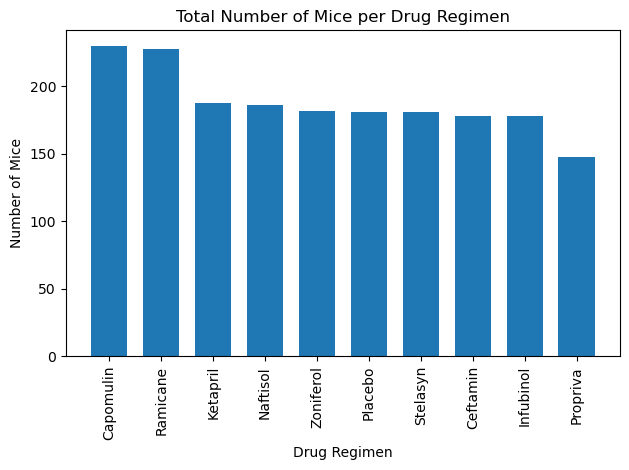

In [84]:
# Generate a bar plot showing the total number of mice for each treatment 
# Set x axis
x_axis_regimen = np.arange(len(no_mice_per_regimen))
regimen_name = list(no_mice_per_regimen.index.values)

# Create bar chart
py_bar_mice_per_regimen = plt.bar(x_axis_regimen, no_mice_per_regimen, width=0.7)

# Set x/y label, title
plt.xticks(x_axis_regimen, regimen_name, rotation='vertical')
plt.title('Total Number of Mice per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')

# Save bar graph to Images folder
plt.tight_layout()
plt.savefig('images/py_bar_mice_per_regimen.png')

# Present the bar chart
plt.show()

# To close pyplot
plt.close()


In [85]:
# Calculate number of mice for each sex
sex_mice = analysis_data_df.groupby('Sex')['Sex'].count()
sex_mice

Sex
Female    922
Male      958
Name: Sex, dtype: int64

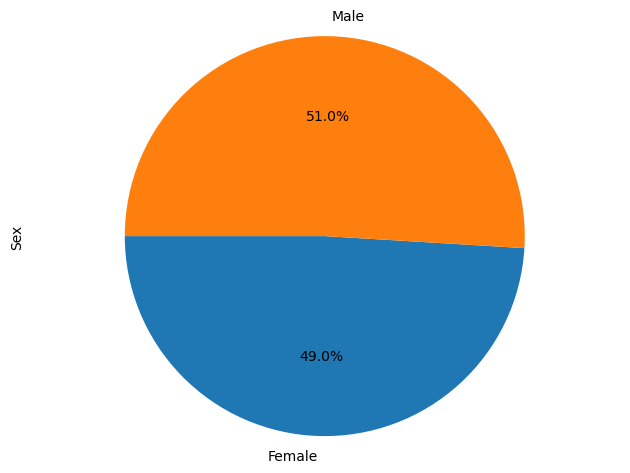

In [86]:
# Generate a pie chart
pd_pie_mice_sex = sex_mice.plot(kind='pie', autopct='%1.1f%%', startangle=180)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Set x/y label, title
pd_pie_mice_sex.set_ylabel('Sex')
# Save bar graph to Images folder
plt.tight_layout()
pd_pie_mice_sex.figure.savefig('images/pd_pie_mice_sex.png')
# Present the bar chart
plt.show()
# To close pyplot
#plt.close()

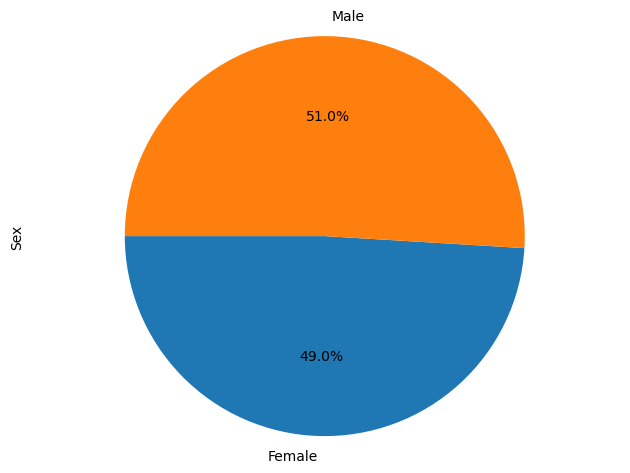

In [87]:
# Set x_axis and colors
sex = sex_mice.index
# Create pie chart
py_bar_mice_sex = plt.pie(sex_mice, labels=sex_mice.index, autopct="%1.1f%%", startangle=180)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Set x/y label, title
plt.ylabel('Sex')
# Save an image of pie chart
plt.tight_layout()
plt.savefig('images/py_pie_mice_sex.png')
# Present the bar chart
plt.show()
# To close pyplot
plt.close()

## Quartiles, Outliers and Boxplots

In [88]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_vol = analysis_data_df.groupby(['Drug Regimen', 'Mouse ID']).last()[['Timepoint', 'Tumor Volume (mm3)']]
final_tumor_df = final_tumor_vol.reset_index()

In [89]:
# Put treatments into a list for for loop (and later for plot labels)
regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vol_list = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in regimen:

    final_tumor_vol = final_tumor_df.loc[final_tumor_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']

    final_tumor_vol_list.append(final_tumor_vol)

    # Calculate the IQR and quantitatively
    quartiles = final_tumor_vol.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    mean = final_tumor_vol.mean()
    iqr = upperq-lowerq    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    # Determine outliers using upper and lower bounds
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) 
                  | (final_tumor_vol > upper_bound)]

     # Print out the result
    print(f"{drug} Regimen")
    print(f"Final tumor volume(mm3) for {drug} below {round(lower_bound,2)} could be outliers.")
    print(f"Final tumor volume(mm3) for {drug} above {round(upper_bound,2)} could be outliers.")
    print(f"Average tumor volume(mm3) for {drug} is: {round(mean,2)}")
    print(f"Number of outliers for Capomulin is: {outliers.count()}")
    if outliers.count() > 0:
        for i in outliers.index:
            print(f'Outlier final tumor volume(mm3) is {round(outliers[i], 2)}')
    print('----------------------------------------------------------')


Capomulin Regimen
Final tumor volume(mm3) for Capomulin below 20.7 could be outliers.
Final tumor volume(mm3) for Capomulin above 51.83 could be outliers.
Average tumor volume(mm3) for Capomulin is: 36.67
Number of outliers for Capomulin is: 0
----------------------------------------------------------
Ramicane Regimen
Final tumor volume(mm3) for Ramicane below 17.91 could be outliers.
Final tumor volume(mm3) for Ramicane above 54.31 could be outliers.
Average tumor volume(mm3) for Ramicane is: 36.19
Number of outliers for Capomulin is: 0
----------------------------------------------------------
Infubinol Regimen
Final tumor volume(mm3) for Infubinol below 36.83 could be outliers.
Final tumor volume(mm3) for Infubinol above 82.74 could be outliers.
Average tumor volume(mm3) for Infubinol is: 58.18
Number of outliers for Capomulin is: 1
Outlier final tumor volume(mm3) is 36.32
----------------------------------------------------------
Ceftamin Regimen
Final tumor volume(mm3) for Ceftami

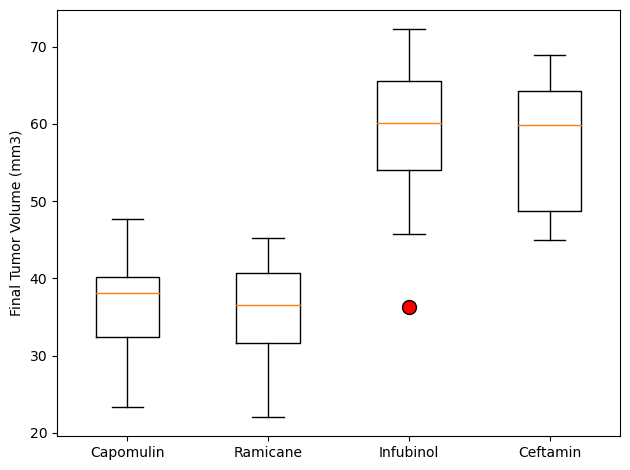

In [91]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, final_tumor_plot = plt.subplots()
final_tumor_plot.boxplot(final_tumor_vol_list, labels=regimen, flierprops={'markerfacecolor':'r','markersize': 10})

# Set x/y label, title
final_tumor_plot.set_ylabel('Final Tumor Volume (mm3)')

# Save box plot graph to Images folder
plt.tight_layout()
final_tumor_plot.figure.savefig('images/final_tumor_boxplot.png')

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()

## Line and Scatter Plots

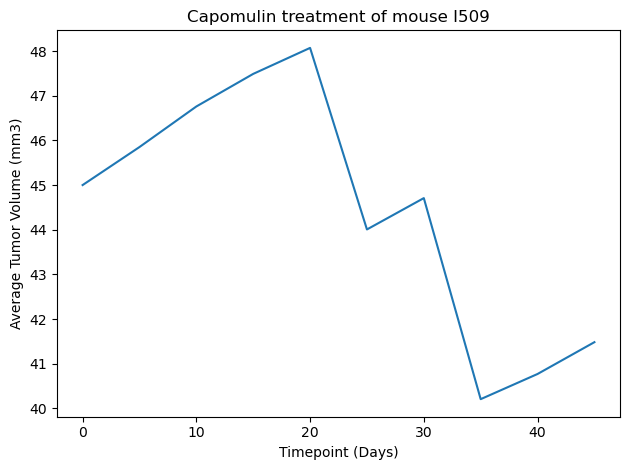

In [92]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Generate dataframe only in Capomulin Regimen
Capomulin_df = analysis_data_df.loc[analysis_data_df['Drug Regimen'] == 'Capomulin']

# Identify specific mouse ID and get data of the mouse id
mouse_id = 'l509'
mouse_df = Capomulin_df.loc[Capomulin_df['Mouse ID'] == mouse_id]

# Generate a line plot
time_vol = plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'])

# Set x/y label, title
plt.title('Capomulin treatment of mouse I509')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Average Tumor Volume (mm3)')

# Save line graph to Images folder
plt.tight_layout()
plt.savefig('images/l509_tumor_plot.png')

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()

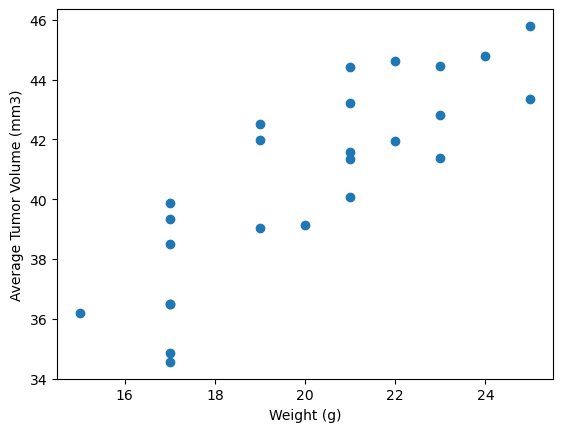

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the data in the 'Capomulin_df' DataFrame

# Calculate the mean of Weight (g) and Tumor Volume (mm3) based on Mouse ID
numeric_columns = ['Weight (g)', 'Tumor Volume (mm3)']
mouse_data = Capomulin_df.groupby('Mouse ID')[numeric_columns].mean()

# Create a scatter plot
plt.scatter(mouse_data['Weight (g)'], mouse_data['Tumor Volume (mm3)'])

# Set x/y labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the scatter plot
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.84


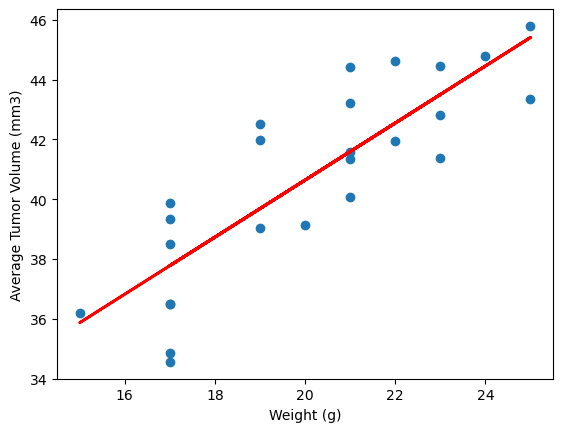

In [94]:
import matplotlib.pyplot as plt
from scipy.stats import linregress  # Import the linregress function

correlation = mouse_data['Tumor Volume (mm3)'].corr(mouse_data['Weight (g)'])
print(f"The correlation between mouse weight and the average tumor volume is: {correlation:.2f}")

# Assuming you have a dataframe or dataset called 'mouse_data'
# and it has columns 'Weight (g)' and 'Tumor Volume (mm3)'

plt.scatter(mouse_data['Weight (g)'], mouse_data['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(mouse_data['Weight (g)'], mouse_data['Tumor Volume (mm3)'])
line = slope * mouse_data['Weight (g)'] + intercept

# Plot the linear regression line
plt.plot(mouse_data['Weight (g)'], line, color='red', linewidth=2)
plt.show()
